<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/Assignment_9/c)_Gaussian_Mixtures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits


In [ ]:
# Generate random data without fixed centers
np.random.seed(42)
X = np.random.uniform(low=-5, high=5, size=(400, 2))  # Uniformly distributed points in 2D space

<ipython-input-20-771814844c78>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis')


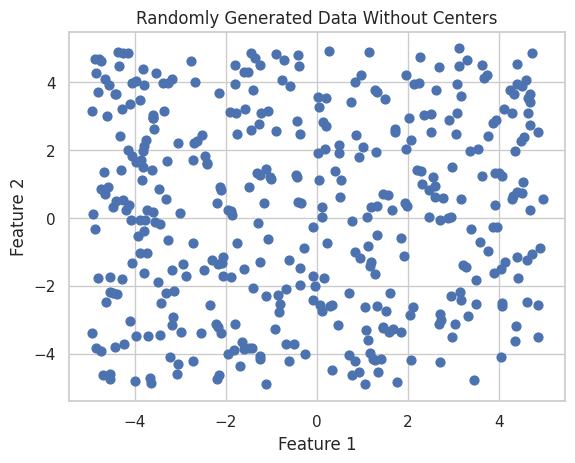

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis')
plt.title("Randomly Generated Data Without Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

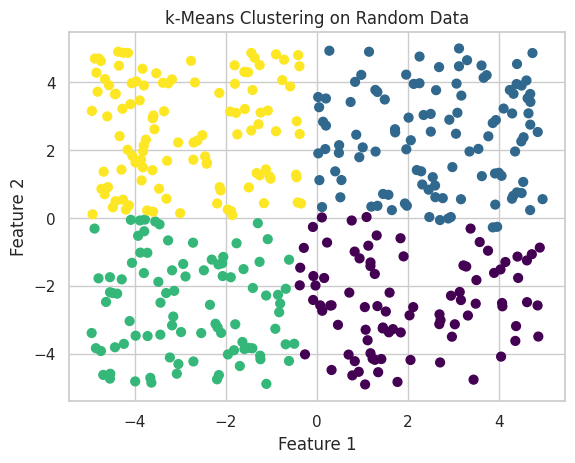

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
labels_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, s=40, cmap='viridis')
plt.title("k-Means Clustering on Random Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

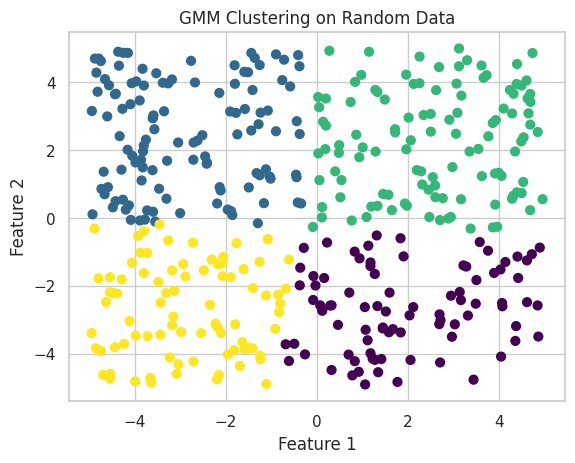

In [ ]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
labels_gmm = gmm.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, s=40, cmap='viridis')
plt.title("GMM Clustering on Random Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


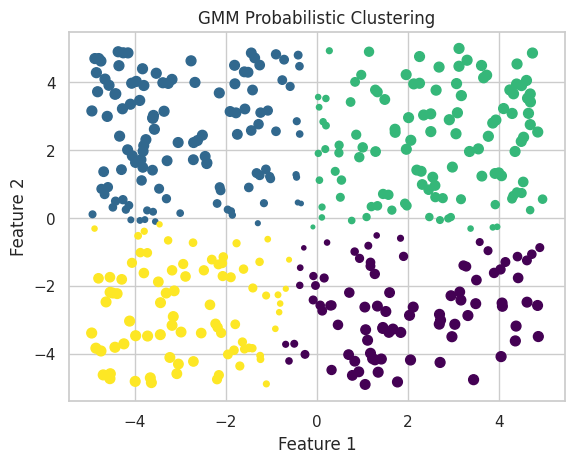

In [ ]:
probs = gmm.predict_proba(X)
size = 50 * probs.max(1) ** 2  # Square emphasizes differences

plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, s=size, cmap='viridis')
plt.title("GMM Probabilistic Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


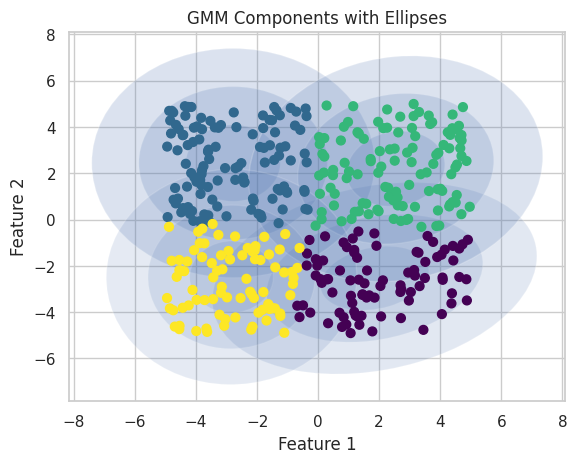

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        width, height = 2 * np.sqrt(covariance)
        angle = 0
    for nsig in range(1, 4):
        # Pass angle as a keyword argument
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle=angle, **kwargs))

def plot_gmm(gmm, X):
    ax = plt.gca()
    labels = gmm.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM Components with Ellipses")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plot_gmm(gmm, X)
plt.show()

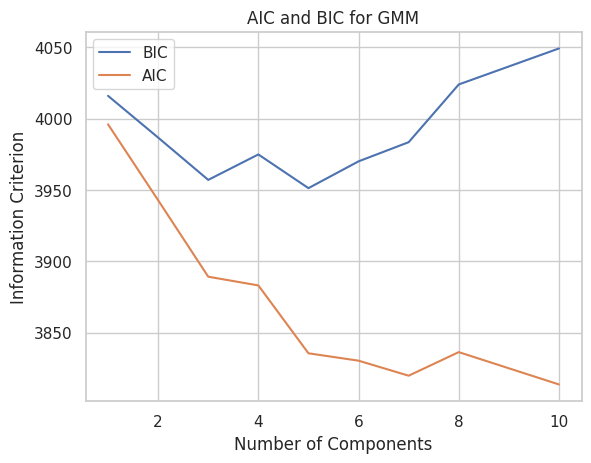

In [ ]:
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel("Number of Components")
plt.ylabel("Information Criterion")
plt.title("AIC and BIC for GMM")
plt.show()


<ipython-input-27-ec497c431286>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_new[:, 0], X_new[:, 1], s=40, cmap='viridis')


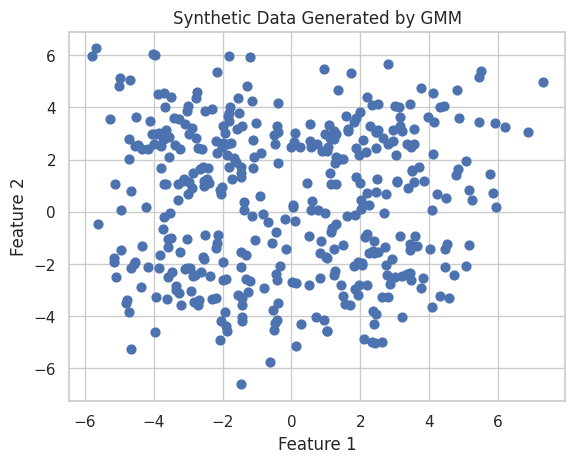

In [ ]:
X_new, y_new = gmm.sample(400)

plt.scatter(X_new[:, 0], X_new[:, 1], s=40, cmap='viridis')
plt.title("Synthetic Data Generated by GMM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


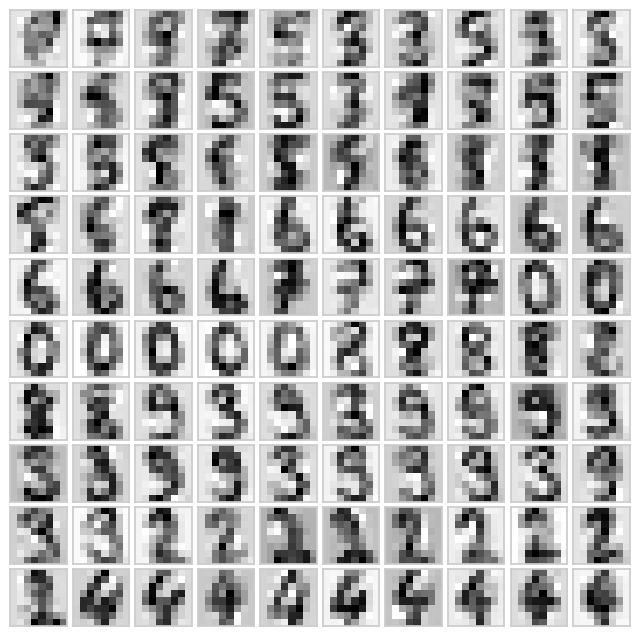

In [ ]:
digits = load_digits()
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

gmm_digits = GaussianMixture(n_components=10, covariance_type='full', random_state=42)
gmm_digits.fit(data)

data_new, _ = gmm_digits.sample(100)
digits_new = pca.inverse_transform(data_new)

def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                             subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest')

plot_digits(digits_new)
plt.show()
